# Data Cleaning and Analysis Script for CSCI526 ChestNut Game Entropy

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os

file_name = 'ChestNut_Data_10-17.csv'

line = '\n=======================================================================================\n'

In [2]:
df = pd.read_csv(file_name)

In [3]:
df.drop(columns=['Timestamp'], inplace=True)

In [4]:
display(df)

,Player ID,Tag,Time
0,638009521531898,lv0-start,638014644449596
1,638009521531898,lv0-start,638014644861436
2,638009521531898,lv0-logo,638014644881033
3,638009521531898,lv0-item-redcube,638014644887376
4,638009521531898,lv0-item-redcube,638014644914952
...,...,...,...
1935,638009521531898,lv0-item-redcube,638016098501890
1936,638009521531898,lv0-item-bluecube,638016098542749
1937,638009521531898,lv0-item-bluecube,638016098547728
1938,638009521531898,lv0-logo,638016098554174


In [5]:
gb = df.groupby('Player ID')    
player_list = [gb.get_group(x) for x in gb.groups]

In [6]:
start_list = ['lv0-start', 'lv1-start', 'lv2-start', 'lv3-start', 'lv4-start']
end_list = ['lv0-success', 'lv1-success', 'lv2-success', 'lv3-success', 'lv4-success',
            'lv0-death', 'lv1-death', 'lv2-death', 'lv3-death', 'lv4-death',
            'lv0-quit', 'lv1-quit', 'lv2-quit', 'lv3-quit', 'lv4-quit']
pause_list = ['lv0-pause', 'lv1-pause', 'lv2-pause', 'lv3-pause', 'lv4-pause']
resume_list = ['lv0-resume', 'lv1-resume', 'lv2-resume', 'lv3-resume', 'lv4-resume']
player_game_list = []

for player_df in player_list: 
    #display(player_df)

    #print(player_game_list)
    player_df = player_df.sort_values(['Time'], ascending=True)
    game_list = []
    started = -1
    seq_list = []
    for index, row in player_df.iterrows():
        if row['Tag'] in start_list:
            if started == -1:
                started = start_list.index(row['Tag'])
                seq_list.append([row['Tag'], row['Time']])
            else:
                started = start_list.index(row['Tag'])
                seq_list = []
                seq_list.append([row['Tag'], row['Time']])
        elif row['Tag'] in end_list:
            if started != -1:
                seq_list.append([row['Tag'], row['Time']])
                game_list.append(seq_list)
                seq_list = []
                started = -1
        elif started != -1:
                seq_list.append([row['Tag'], row['Time']])
        #display(row['Tag'])
    player_game_list.append([player_df.iloc[0]['Player ID'],game_list])

In [7]:
level_name = ['Level 0', 'Level 1', 'Level 2', 'Level 3', 'Level 4']



for item in player_game_list:
    print(line)
    print('Player ID: %d'%(item[0]))
    for game in item[1]:
        print('\nPlayed Level %d'%(start_list.index(game[0][0])))
        for cp in game:
            print('%s '%(cp[0]), end='')
        print('\nGame Time: %f'%((game[len(game)-1][1] - game[0][1])/10000))
            



Player ID: 638008528272180

Played Level 0
lv0-start lv0-item-redcube lv0-logo lv0-item-redcube lv0-item-bluecube lv0-item-bluecube lv0-item-bluecube lv0-logo lv0-logo lv0-logo lv0-success 
Game Time: 30.096000

Played Level 1
lv1-start lv1-item-bluecube lv1-logo lv1-logo lv1-logo lv1-item-redcube lv1-item-redcube lv1-item-redcube lv1-item-bluecube lv1-item-bluecube lv1-item-bluecube lv1-item-key lv1-logo lv1-logo lv1-logo lv1-success 
Game Time: 80.944000

Played Level 2
lv2-start lv2-settings lv2-quit 
Game Time: 4.425000

Played Level 0
lv0-start lv0-item-redcube lv0-item-redcube lv0-item-bluecube lv0-item-bluecube lv0-item-bluecube lv0-logo lv0-logo lv0-logo lv0-success 
Game Time: 25.211000

Played Level 1
lv1-start lv1-settings lv1-quit 
Game Time: 4.609000

Played Level 3
lv3-start lv3-item-redcube lv3-item-redcube lv3-cp-1 lv3-item-key lv3-item-redcube lv3-cp-4 lv3-item-key lv3-item-key lv3-item-key lv3-logo lv3-success 
Game Time: 91.495000

Played Level 4
lv4-start lv4-cp-0

In [8]:
sorted_data = [[[],[],[]],[[],[],[]],[[],[],[]],[[],[],[]],[[],[],[]]]
#sorted_data schema: [#level:[ #succes:[], #died:[], #quit:[] ] ]

for item in player_game_list:
    #print(line)
    #print('Player ID: %d'%(item[0]))
    for game in item[1]:
        pause_time = 0
        pause_start = 0
        pause = False
        for cp in game:
            if cp[0] in pause_list:
                pause_start = cp[1] 
                pause = True
            elif pause and (cp[0] in resume_list or cp[0] in end_list):
                pause_time += cp[1] - pause_start
                pause = False
                
        game_time = ((game[len(game)-1][1] - game[0][1]) - pause_time)/10000
        level = start_list.index(game[0][0])
        ending = int(end_list.index(game[len(game)-1][0]) / 5)
        #print(game_time)
        #print(pause_time)
        #print('level %d, ending %d'%(level,ending))
        sorted_data[level][ending].append([game, game_time])

In [32]:
level_labels = ['Tutorial', 'Go Around', 'Lit It Up', 'Long Way Down', 'Fall Then Jump']
def game_stat_painter(labels, sub_labels, data, title, unit, sub_color = None, x_rotation = 0, label_format = '%d'):
    label_size = 12
    font_size = 18
    title_size = 22
    bar_count = len(data[0])
    
    if bar_count != len(sub_labels):
        print('Wrong Input Size!')
        return 
    
    bar_width = 0.7 / bar_count
    
    x = np.arange(len(labels))  # the label locations
    fig, ax = plt.subplots(figsize=(15, 10))
    for i in range(bar_count):
        single_bar_data = [data_list[i] for data_list in data]
        offset = -0.35 + i*bar_width + (bar_width/2)
        if sub_color != None:
            rects = ax.bar(x+offset , single_bar_data, bar_width, label=sub_labels[i], color = sub_color[i])
        else:
            rects = ax.bar(x+offset , single_bar_data, bar_width, label=sub_labels[i])
        if x_rotation != 0:    
            ax.bar_label(rects, fmt = label_format, padding=3, fontsize = label_size, rotation='vertical') 
        else:
            ax.bar_label(rects, fmt = label_format, padding=3, fontsize = label_size)
            
    ax.set_ylabel(unit, fontsize = font_size)
    ax.set_title(title, fontsize = title_size)
    if x_rotation != 0:
        ax.set_xticks(x, ha="right", rotation = x_rotation, rotation_mode="anchor")
        plt.xticks(rotation=x_rotation)
    else:
        ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.tick_params(axis='both', which='both', labelsize=font_size)
    plt.margins(y=0.2)
    ax.legend(fontsize = font_size)
    #fig.tight_layout()
    plt.show()

In [33]:
def pie_plot(labels, data, title, explode = None, colors = None):
    if len(labels) != len(data):
        print('Size mismatch!')
        return
    if explode == None:
        explode = [0.0 for l in labels]

    # Wedge properties
    wp = { 'linewidth' : 1, 'edgecolor' : "green" }

    # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d})".format(pct, absolute)

    # Creating plot
    fig, ax = plt.subplots(figsize =(10, 7))
    wedges, texts, autotexts = ax.pie(data,
                                      autopct = lambda pct: func(pct, data),
                                      explode = explode,
                                      labels = labels,
                                      shadow = True,
                                      colors = colors,
                                      startangle = 90,
                                      wedgeprops = wp)

    # Adding legend
    ax.legend(wedges, labels,
              loc ="center left",
              bbox_to_anchor =(1, 0, 0.5, 1))

    plt.setp(autotexts, size = 12)
    ax.set_title(title)

    # show plot
    plt.show()

In [34]:
avg_play_time = []
for i in range(5):
    avg_play_time.append([0,0,0])
    
#succes:[], #died:[], #quit:[]

for lv in range(5):
    for i in range(3):
        sum = 0
        counter = 0
        for item in sorted_data[lv][i]:
            counter += 1
            sum += item[1]
        if counter == 0:
            avg_time = 0
        else:
            avg_time = sum / counter
        avg_play_time[lv][i] = avg_time
        print('Average level game time for %d level%d is %fS'%(i, lv, avg_time))
print(avg_play_time)

Average level game time for 0 level0 is 43.892791S
Average level game time for 1 level0 is 0.000000S
Average level game time for 2 level0 is 46.475180S
Average level game time for 0 level1 is 93.107400S
Average level game time for 1 level1 is 81.885400S
Average level game time for 2 level1 is 11.325227S
Average level game time for 0 level2 is 84.860757S
Average level game time for 1 level2 is 74.527706S
Average level game time for 2 level2 is 19.255262S
Average level game time for 0 level3 is 238.658400S
Average level game time for 1 level3 is 63.800340S
Average level game time for 2 level3 is 78.677580S
Average level game time for 0 level4 is 109.558833S
Average level game time for 1 level4 is 62.406677S
Average level game time for 2 level4 is 138.397667S
[[43.89279062499999, 0, 46.47518], [93.1074, 81.88539999999999, 11.325226666666664], [84.86075714285714, 74.52770588235295, 19.25526153846154], [238.65839999999997, 63.800340000000006, 78.67758], [109.55883333333333, 62.4066769230769

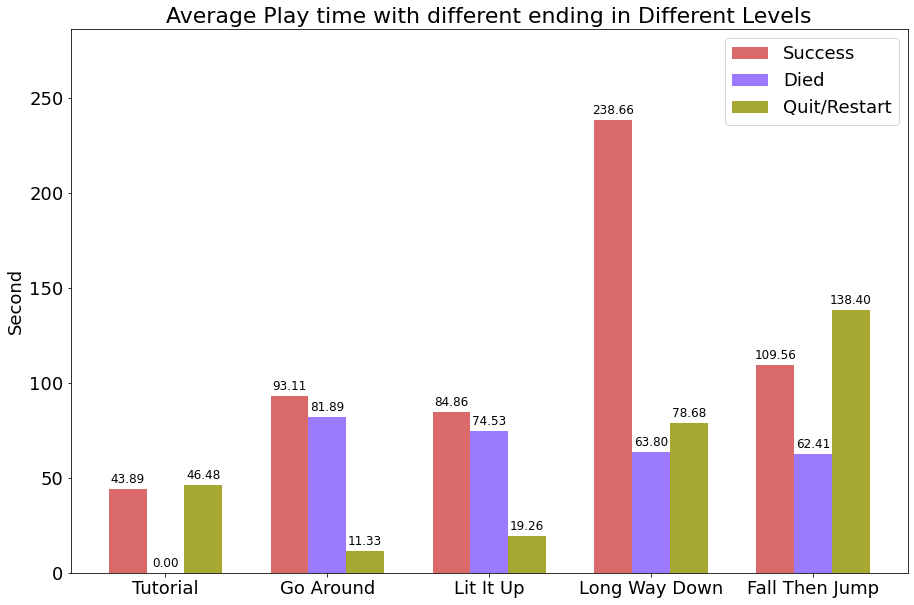

In [35]:
game_stat_painter(level_labels, ['Success', 'Died', 'Quit/Restart'], 
                    avg_play_time, 'Average Play time with different ending in Different Levels', 'Second', 
                  sub_color=['#db6b6b', '#9c7aff', '#a6a832'], label_format= '%.2f')

In [36]:
for level in sorted_data:
    sum = 0
    counter = 0
    for item in level[1]:
        counter += 1
        sum += item[1]
    if counter == 0:
            avg_time = 0
    else:
        avg_time = sum / counter
    print('Average level game time for level%d is %fS'%(sorted_data.index(level), avg_time))

Average level game time for level0 is 0.000000S
Average level game time for level1 is 81.885400S
Average level game time for level2 is 74.527706S
Average level game time for level3 is 63.800340S
Average level game time for level4 is 62.406677S


In [37]:
for level in sorted_data:
    sum = 0
    counter = 0
    for item in level[2]:
        counter += 1
        sum += item[1]
    if counter == 0:
            avg_time = 0
    else:
        avg_time = sum / counter
    print('Average level game time for level%d is %fS'%(sorted_data.index(level), avg_time))

Average level game time for level0 is 46.475180S
Average level game time for level1 is 11.325227S
Average level game time for level2 is 19.255262S
Average level game time for level3 is 78.677580S
Average level game time for level4 is 138.397667S


## Collected Items

In [38]:
#item_count format: #level:[ #red, #blue, #key ] cp format lv#-item-redcube
item_count = []


for i in range(5):
    item_count.append([0,0,0,0])

for i in range(len(sorted_data)):
    for game_list in sorted_data[i]:
        for game_data in game_list:
            for check_pts in game_data[0]:
                if 'redcube' in check_pts[0]:
                    item_count[int(check_pts[0][2])][0] += 1
                elif 'bluecube' in check_pts[0]:
                    item_count[int(check_pts[0][2])][1] += 1
                elif 'key' in check_pts[0]:
                    item_count[int(check_pts[0][2])][2] += 1
                elif 'logo' in check_pts[0]:
                    item_count[int(check_pts[0][2])][3] += 1
                    
print(item_count )

[[75, 108, 0, 135], [68, 62, 11, 64], [81, 77, 45, 37], [43, 65, 43, 42], [40, 45, 13, 19]]


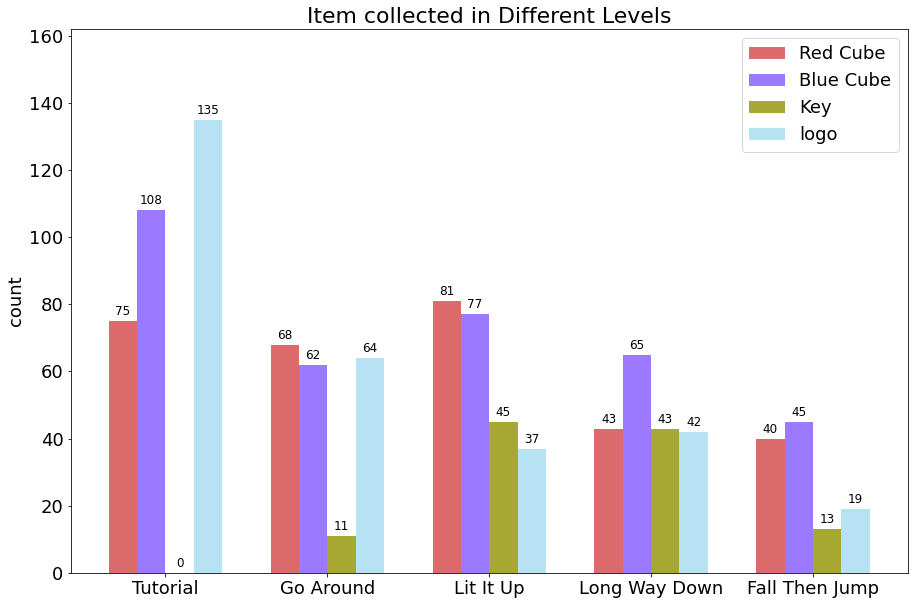

In [39]:
game_stat_painter(level_labels, ['Red Cube', 'Blue Cube', 'Key', 'logo'], 
                  item_count, 'Item collected in Different Levels', 'count', sub_color=['#db6b6b', '#9c7aff', '#a6a832', '#b7e2f3'])

In [40]:
#item_count format: #level:[ #red, #blue, #key ] cp format lv#-item-redcube
succ_item_count = []

#sorted_data schema: [#level:[ #succes:[], #died:[], #quit:[] ] ]

for i in range(5):
    succ_item_count.append([0,0,0,0])

for i in range(len(sorted_data)):
    success_time = len(sorted_data[i][0])
    for game_data in sorted_data[i][0]:
        for check_pts in game_data[0]:
            if 'redcube' in check_pts[0]:
                succ_item_count[int(check_pts[0][2])][0] += 1
            elif 'bluecube' in check_pts[0]:
                succ_item_count[int(check_pts[0][2])][1] += 1
            elif 'key' in check_pts[0]:
                succ_item_count[int(check_pts[0][2])][2] += 1
            elif 'log' in check_pts[0]:
                succ_item_count[int(check_pts[0][2])][3] += 1

for i in range(5):
    for j in range(4):
        succ_item_count[i][j] /= len(sorted_data[i][0])
print(succ_item_count)

[[2.0, 3.0, 0.0, 3.71875], [3.4, 4.4, 1.0, 5.2], [3.142857142857143, 2.5714285714285716, 2.4285714285714284, 2.7142857142857144], [4.0, 6.4, 5.0, 5.0], [2.3333333333333335, 2.6666666666666665, 1.1666666666666667, 1.1666666666666667]]


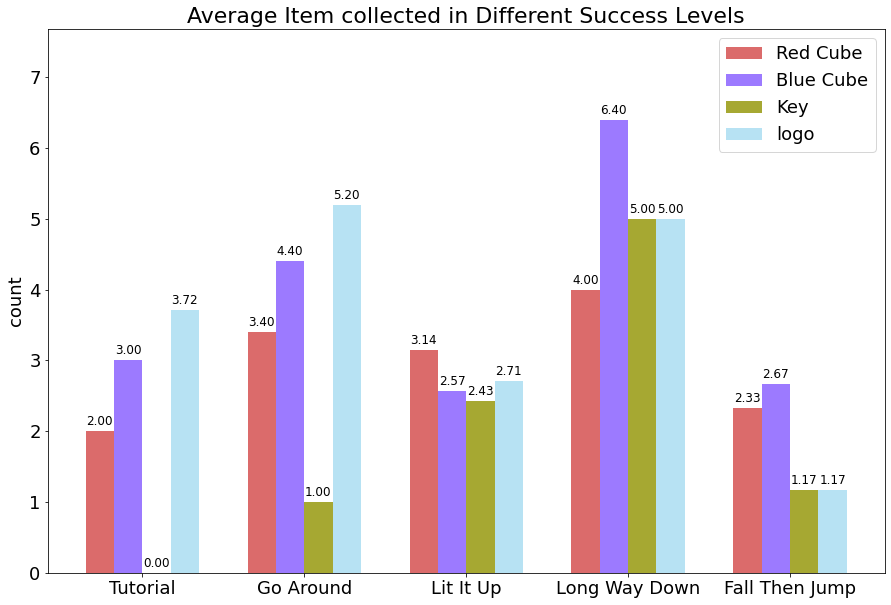

In [41]:
game_stat_painter(level_labels, ['Red Cube', 'Blue Cube', 'Key', 'logo'], 
                  succ_item_count, 'Average Item collected in Different Success Levels', 'count', sub_color=['#db6b6b', '#9c7aff', '#a6a832', '#b7e2f3'], label_format='%.2f')

## Game Play Stat

In [42]:
#Statistics format: #level:[ #Start Count, #Death Count, #Quit Count, #Success Count ]
statistics = []

for i in range(len(sorted_data)):
    succ_count = len(sorted_data[i][0])
    died_count = len(sorted_data[i][1])
    quit_count = len(sorted_data[i][2])
    statistics.append([succ_count + died_count + quit_count, died_count, quit_count, succ_count])



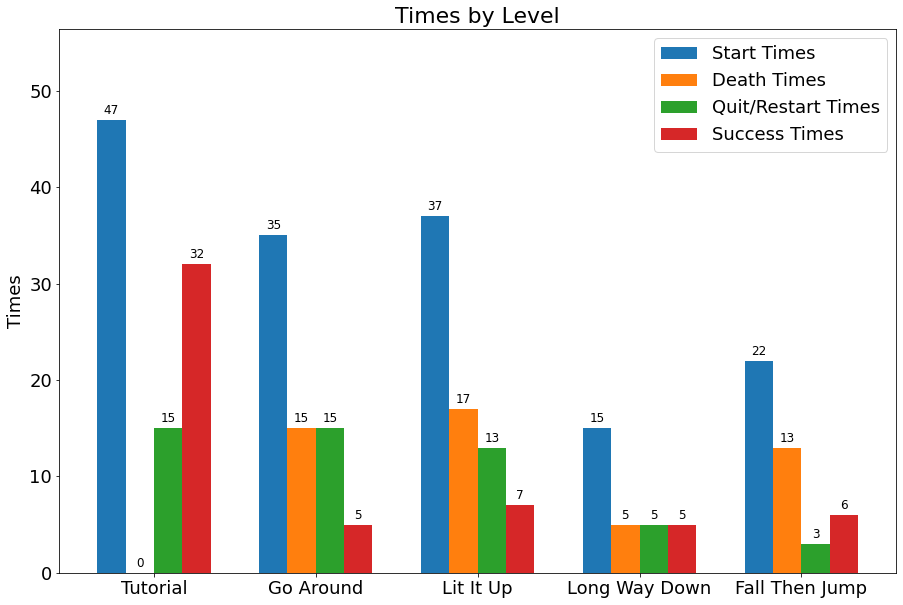

In [43]:
game_stat_painter(level_labels, ['Start Times', 'Death Times', 'Quit/Restart Times', 'Success Times'], 
                  statistics, 'Times by Level', 'Times')

## Check Point Stat

In [44]:
#level_cp_stat format: #level:[ #cp1_count, .... ] cp format lv#-cp-#
level_cp_stat = []


for i in range(5):
    level_cp_stat.append([])

for i in range(len(sorted_data)):
    for game_list in sorted_data[i]:
        for game_data in game_list:
            for check_pts in game_data[0]:
                if 'cp' in check_pts[0]:
                    cp_num = int(check_pts[0][-1])
                    lv_num = int(check_pts[0][2])
                    if len(level_cp_stat[lv_num]) < cp_num+1:
                        for i in range(cp_num - len(level_cp_stat[lv_num]) + 1):
                            level_cp_stat[lv_num].append(0)
                    level_cp_stat[lv_num][cp_num] += 1
                    
print(level_cp_stat)

[[], [], [5, 10, 7, 5, 0, 4], [3, 16, 9, 8, 10, 10, 2, 7, 0, 10], [22, 17, 17, 6, 12, 10, 3, 3, 6]]


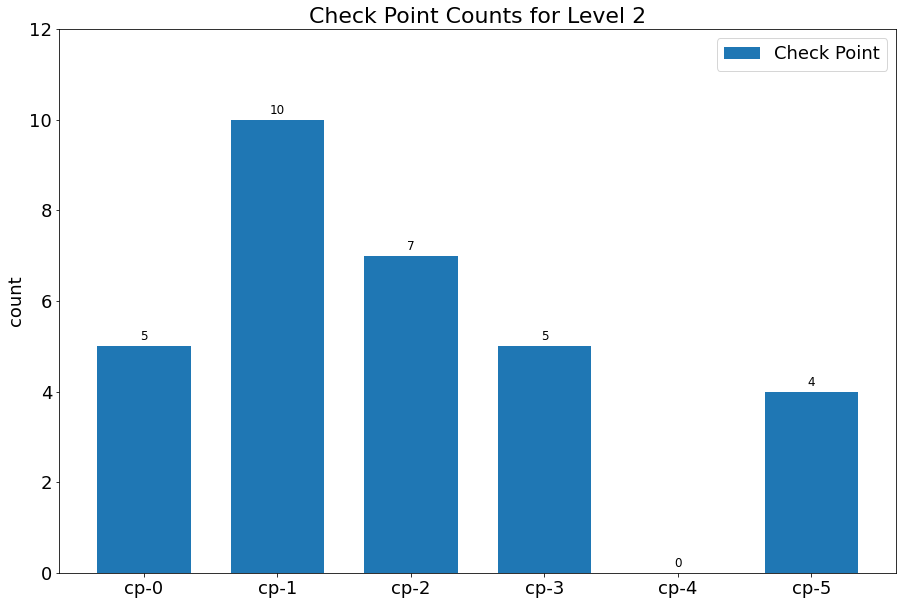

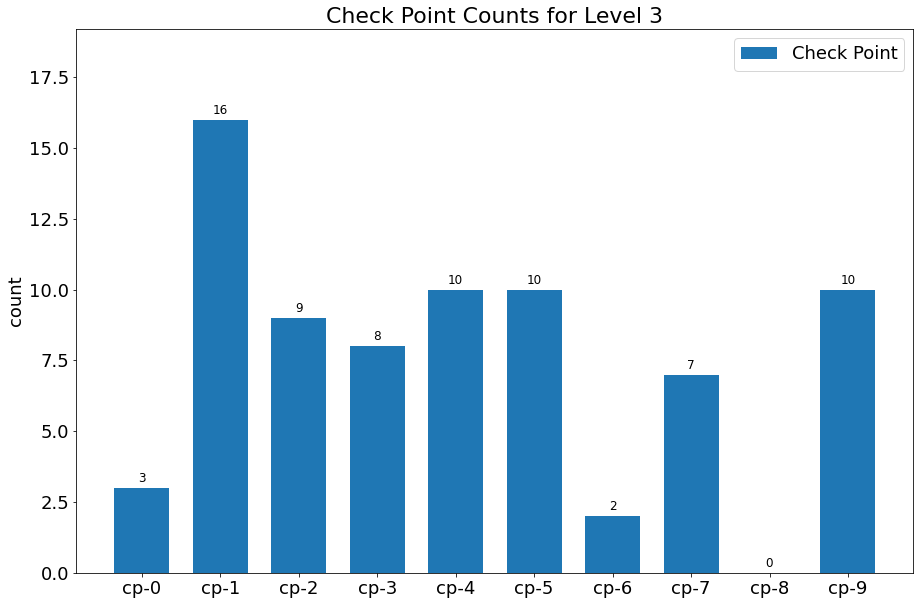

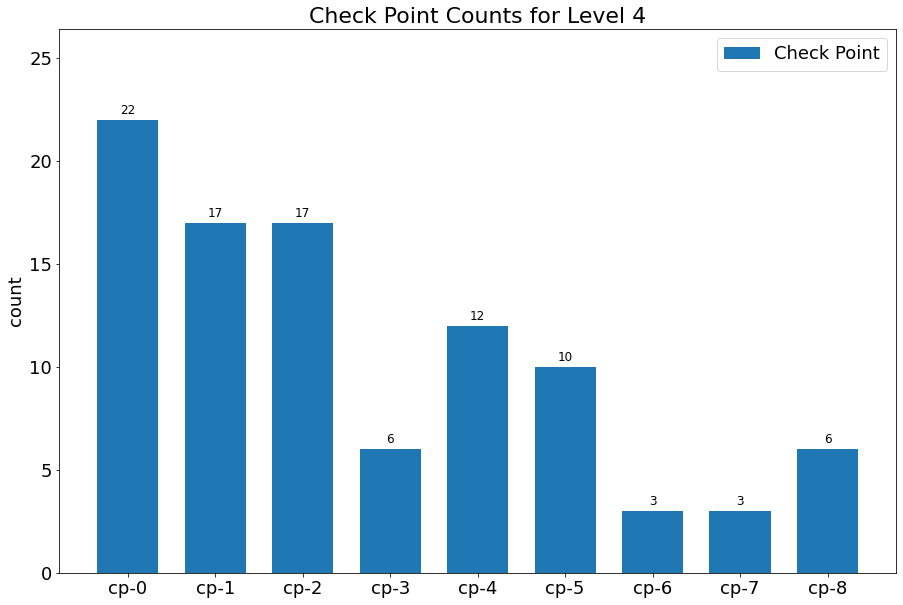

In [45]:
for i in range(2,5):
    game_stat_painter(['cp-'+str(i) for i in range(len(level_cp_stat[i]))], ['Check Point'], 
                      [[count] for count in level_cp_stat[i]], 'Check Point Counts for Level ' + str(i), 'count')

In [46]:
avg_level_cp_stat = []
for i in range(len(level_cp_stat)):
    avg_count = []
    for cp_count in level_cp_stat[i]:
        avg_count.append(cp_count / statistics[i][0])
    avg_level_cp_stat.append(avg_count)
print(avg_level_cp_stat)

[[], [], [0.13513513513513514, 0.2702702702702703, 0.1891891891891892, 0.13513513513513514, 0.0, 0.10810810810810811], [0.2, 1.0666666666666667, 0.6, 0.5333333333333333, 0.6666666666666666, 0.6666666666666666, 0.13333333333333333, 0.4666666666666667, 0.0, 0.6666666666666666], [1.0, 0.7727272727272727, 0.7727272727272727, 0.2727272727272727, 0.5454545454545454, 0.45454545454545453, 0.13636363636363635, 0.13636363636363635, 0.2727272727272727]]


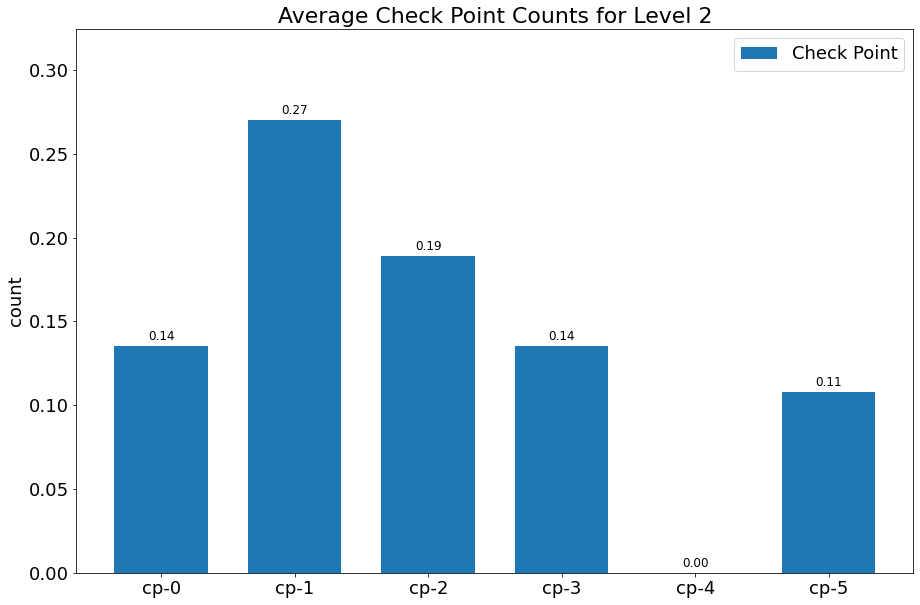

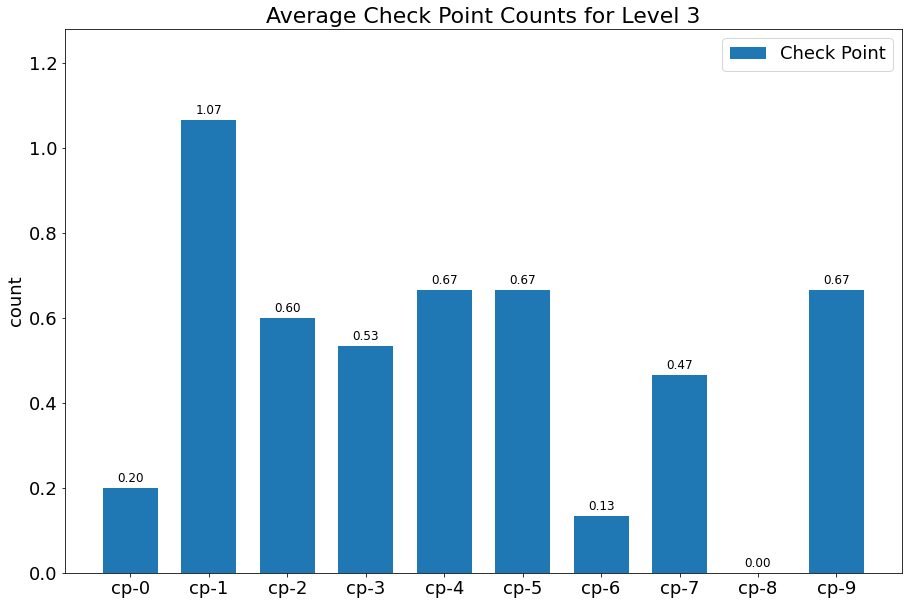

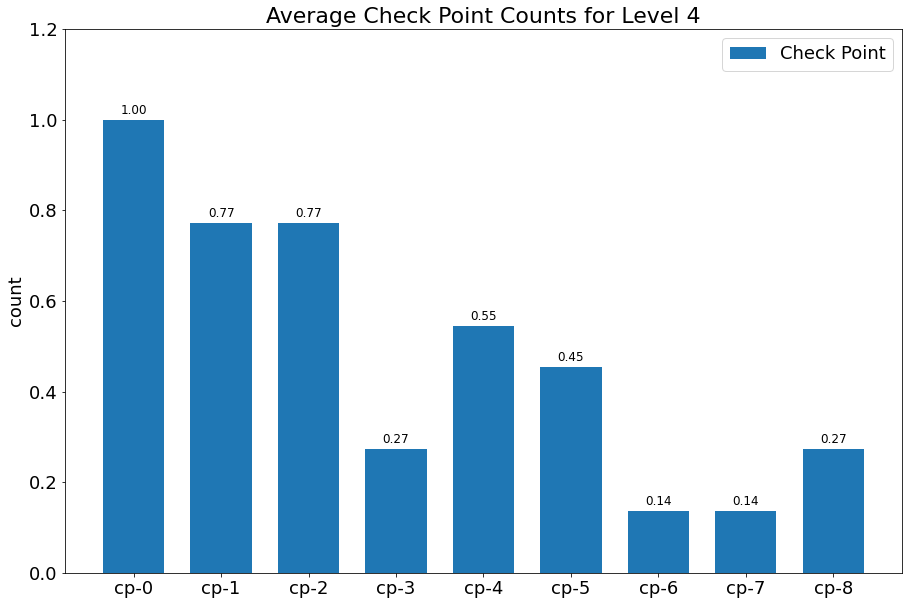

In [47]:
for i in range(2,5):
    game_stat_painter(['cp-'+str(i) for i in range(len(level_cp_stat[i]))], ['Check Point'], 
                      [[count] for count in avg_level_cp_stat[i]], 'Average Check Point Counts for Level ' + str(i), 'count', label_format='%.2f')

## Period Stat

In [48]:
#level_cp_stat format: #level:[ #cp1_count, .... ] cp format lv#-cp-#
level_cp_stat = []
movement_dict = []


for i in range(5):
    movement_dict.append({})

for i in range(len(sorted_data)):
    for game_list in sorted_data[i]:
        for game_data in game_list:
            cp_start = None
            start_time = 0
            pause_start = 0
            pause_time = 0
            for check_pts in game_data[0]:
                if any((cp_str in check_pts[0]) for cp_str in ['cp', 'start', 'quit', 'success', 'death']):
                    if cp_start != None:
                        level_num = int(check_pts[0][2])
                        time_period = check_pts[1] - start_time - pause_time
                        if time_period < 0:
                            print('Start time = %d, pause time = %d'%(start_time,pause_time))
                            print('current cp is %s, last cp is %s'%(check_pts[0],cp_start))
                        pause_time = 0
                        movement_tuple = (cp_start, check_pts[0])
                        if movement_tuple in movement_dict[level_num]:
                            movement_dict[level_num][movement_tuple].append(time_period)
                        else:
                            movement_dict[level_num][movement_tuple] = [time_period]
                    cp_start = check_pts[0]
                    start_time = check_pts[1]
                elif 'pause' in check_pts[0] or 'setting' in check_pts[0]:
                    pause_start = check_pts[1]
                elif 'resume' in check_pts[0]:
                    pause_time += check_pts[1] - pause_start
                    pause_start = 0
#print(movement_dict)

TypeError: set_ticks() got an unexpected keyword argument 'ha'

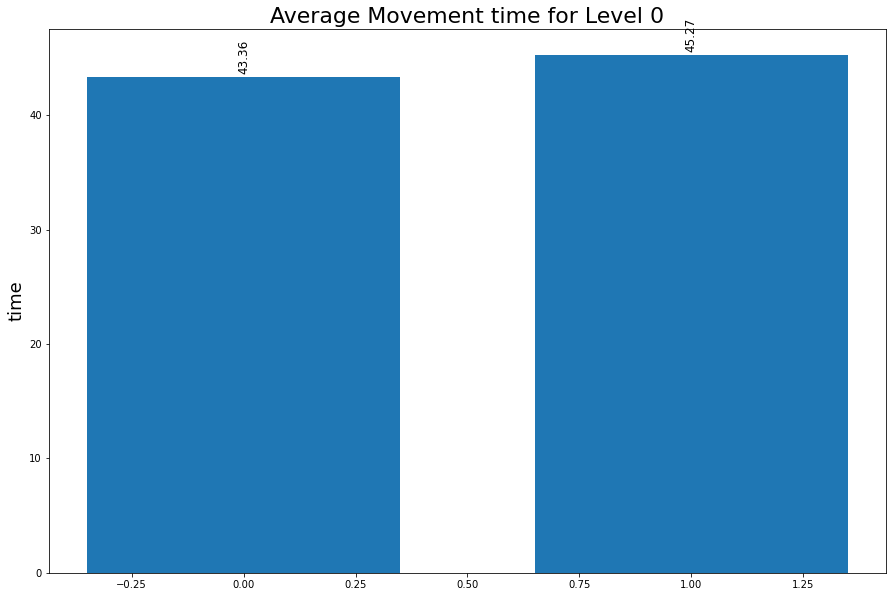

In [49]:
level_movement_label = []
level_movement_time_avg = []
level_movement_count = []


for i in range(5):
    level_movement_label.append([])
    level_movement_time_avg.append([])
    level_movement_count.append([])
    for movement, time_list in movement_dict[i].items():
        time_sum = 0
        for time in time_list:
            time_sum += time
        level_movement_label[i].append(movement[0] + ' to ' + movement[1])
        level_movement_time_avg[i].append(time_sum / len(time_list) / 10000)
        level_movement_count[i].append(len(time_list))

for i in range(5):
    game_stat_painter(level_movement_label[i], ['Average Passing Time'],
                      [[number] for number in level_movement_time_avg[i]], 'Average Movement time for Level ' + str(i), 'time', x_rotation= 60, label_format= '%.2f')
    game_stat_painter(level_movement_label[i], ['Movement Count'], 
                      [[number] for number in level_movement_count[i]], 'Movement Count for Level ' + str(i), 'count', x_rotation= 60, label_format= '%.2f')

In [50]:
selection_pie = []
for level in sorted_data:
    selection_pie.append(len(level[0])+len(level[1])+len(level[2]))
print(selection_pie)

[47, 35, 37, 15, 22]


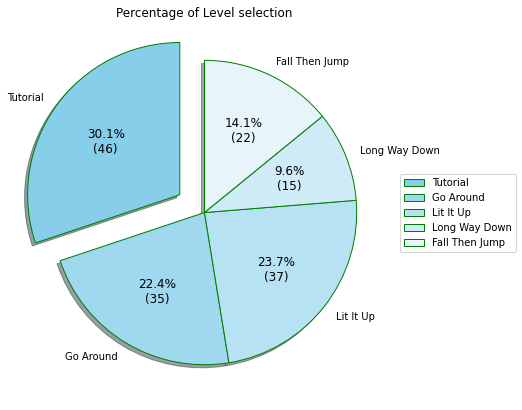

In [58]:
pie_plot(['Tutorial', 'Go Around', 'Lit It Up', 'Long Way Down', 'Fall Then Jump'], 
         selection_pie, 'Percentage of Level selection', 
         explode = [0.2,0.0,0.0,0.0,0.0], 
         colors = ['#87ceeb', '#9fd8ef', '#b7e2f3', '#cfebf7', '#e7f5fb'])

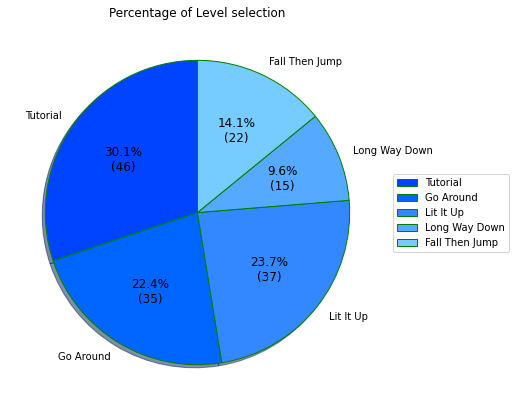

In [55]:
pie_plot(['Tutorial', 'Go Around', 'Lit It Up', 'Long Way Down', 'Fall Then Jump'], selection_pie, 'Percentage of Level selection', colors = ['#0044ff', '#0066ff', '#3388ff', '#55aaff', '#77ccff'])

In [53]:
#item_count format: #level:[ #red, #blue, #key ] cp format lv#-item-redcube
completion_count = []


for i in range(5):
    completion_count.append([])

for i in range(5):
    for game_play in sorted_data[i][0]:
        logo_count = 0
        for check_pts in game_play[0]:
            if 'logo' in check_pts[0]:
                logo_count += 1
        completion_count[i].append(logo_count)
                    
print(completion_count)

logo_max = [4,6,10,9,6]

completion_avg = []
for i in range(5):
    counter = 0
    comp_sum = 0
    for logo_num in completion_count[i]:
        comp_sum += logo_num/logo_max[i]
        counter += 1
    if counter == 0:
        comp_avg = 0
    else:
        comp_avg = comp_sum / counter
    completion_avg.append(comp_avg)
    
print(completion_avg)

[[4, 3, 4, 5, 4, 3, 4, 3, 3, 4, 4, 4, 3, 4, 3, 5, 3, 4, 4, 3, 4, 4, 4, 4, 2, 4, 4, 3, 4, 4, 5, 3], [6, 4, 6, 5, 5], [2, 0, 1, 3, 3, 5, 5], [1, 5, 5, 4, 10], [0, 5, 1, 0, 0, 1]]
[0.9296875, 0.8666666666666666, 0.27142857142857146, 0.5555555555555556, 0.19444444444444445]


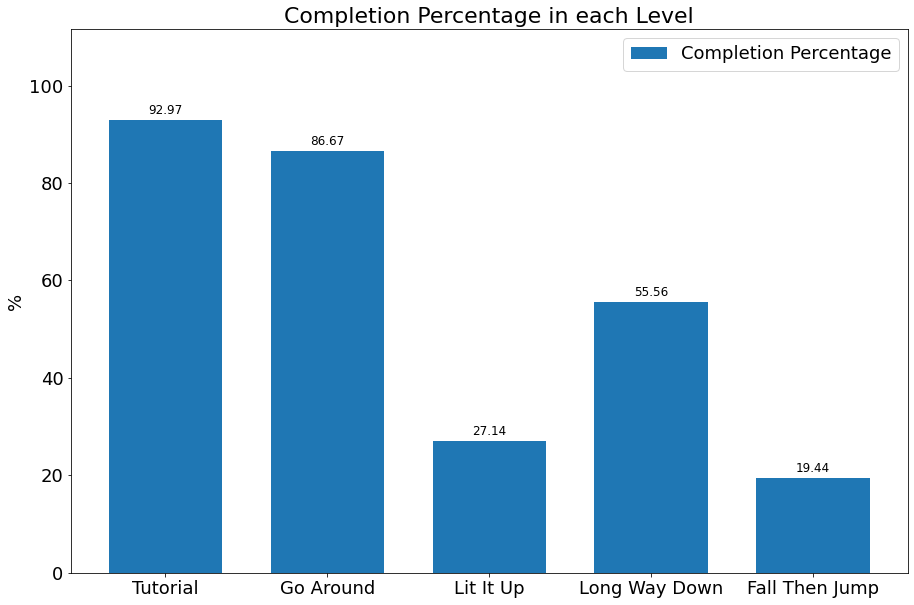

In [54]:
game_stat_painter(level_labels, ['Completion Percentage'], 
                      [[number*100] for number in completion_avg], 'Completion Percentage in each Level', '%', label_format= '%.2f')